In [1]:
#import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('retail.csv')
df.head()

,Age,City,Total Sales
0,0,NaN,10053.33
1,41,SASKATOON,8654.14
2,0,NaN,3284.41
3,0,NaN,3699.95
4,0,SASKATOON,44536105.29


In [3]:
len(df)

185080

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185080 entries, 0 to 185079
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Age          185080 non-null  int64  
 1   City         126535 non-null  object 
 2   Total Sales  185080 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [5]:
#City names are missing so, in this step the rows where cities are missing will be removed
df1 = df.dropna(subset=['City'])

In [6]:
len(df1)

126535

In [7]:
#There are some invalid ages (0), so replace them with median age
df1['Age'].replace(0, df['Age'].median(), inplace = True)

/var/folders/jz/l291cf8s441d5c4swjg53z5c0000gn/T/ipykernel_62351/3780102994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Age'].replace(0, df['Age'].median(), inplace = True)


In [8]:
len(df1)

126535

In [9]:
df1.head()

,Age,City,Total Sales
1,41,SASKATOON,8654.14
4,47,SASKATOON,44536105.29
8,86,SASKATOON,10974.11
10,89,SASKATOON,2628.89
14,97,SASKATOON,368.29


In [10]:
# Standardizing total sales and age
scaler = StandardScaler()
df1[['Age', 'Total Sales']] = scaler.fit_transform(df1[['Age', 'Total Sales']])

/var/folders/jz/l291cf8s441d5c4swjg53z5c0000gn/T/ipykernel_62351/3477653071.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['Age', 'Total Sales']] = scaler.fit_transform(df1[['Age', 'Total Sales']])


In [11]:
# One-hot Encoding 'City'. Label encoding is not suitable in this case as cities are not ordinal
df2 = pd.get_dummies(df1, columns = ['City'], drop_first = True)

In [12]:
df2.head()

,Age,Total Sales,City_ DUVAL,City_ MARTENSVILLE,City_ NORTH BATTLEFORD,City_ OUTLOOK,City_ SASKATOON,City_108 MILE RANCH,City_1408 EDWARD AVENUE,City_150 MILE HOUSE,...,City_YELLOWKNIFE,City_YMIR,City_YORKTON,City_YOUNG,City_YPSILANTI,City_Yellow Grass,City_ZEALANDIA,City_ZEKNER,City_ZELMA,City_ZENON PARK
1,-0.792819,0.055137,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.472920,355.515484,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.606424,0.073658,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,1.766374,0.007038,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,2.192906,-0.011008,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#Finding optimal number of clusters using elbow method. SSD = SUM of squared distance. (SOURCE = Medium)
#used n_init = "auto" to hide the warnings
SSD = []
K = range(1, 12)
for k in K:
    kmeans = KMeans(n_clusters = k, n_init = "auto", random_state = 42)
    kmeans.fit(df2)
    SSD.append(kmeans.inertia_)

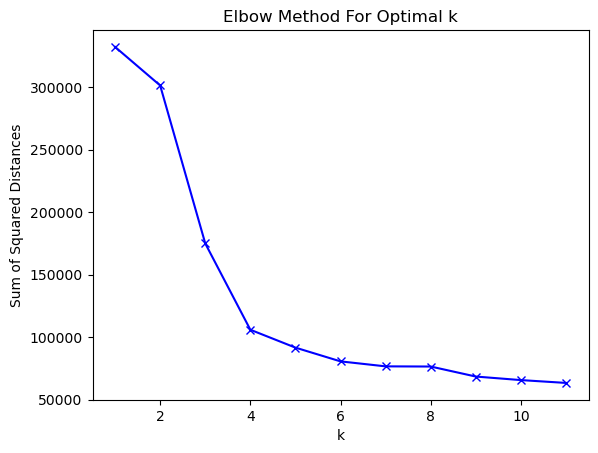

In [14]:
plt.plot(K, SSD, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [16]:
#From the above elbow graph we can see that the optimal number of clusters is 4.
kmeans = KMeans(n_clusters = 4, n_init = "auto", random_state = 42)
df2['Cluster'] = kmeans.fit_predict(df2)